In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = "/content/drive/MyDrive/Freelance/Anomaly Detection Clustering/new_data.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,DATE_DAY,PLATFORM,ACCOUNT_ID,ACCOUNT_NAME,CAMPAIGN_ID,CAMPAIGN_NAME,AD_GROUP_ID,AD_GROUP_NAME,AD_ID,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,0,2021-05-31,facebook_ads,27677371.0,ABC Corp EMEA,6.247976e+12,EMEA_Campaign5,6.247976e+12,NA_Tier5,6.247976e+12,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,1,2023-04-11,linkedin_ads,506553487.0,ABC Corp Global,6.143493e+08,EMEA_Campaign6,1.636556e+08,NA_Tier2,1.190163e+08,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,2,2020-07-16,linkedin_ads,506553487.0,ABC Corp Global,6.060588e+08,APJ_Campaign1,1.515408e+08,APJ_Tier1,1.050956e+08,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,3,2022-06-06,linkedin_ads,507488250.0,ABC Corp Global,6.162051e+08,APJ_Campaign5,1.681136e+08,APJ_Tier4,1.658333e+08,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,4,2022-04-03,linkedin_ads,506553487.0,ABC Corp APJ,6.107646e+08,EMEA_Campaign7,1.574266e+08,APJ_Tier5,1.024694e+08,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [5]:
df.shape

(10000, 18)

In [7]:
# value_to_drop = 'NA_Campaign8' # Since only 1 value is present in the dataset, if it is needed delete this code block

# # Drop rows with the specified value
# df = df[df['CAMPAIGN_NAME'] != value_to_drop]

In [ ]:
# df.CLICKS.value_counts()
# df.IMPRESSIONS.value_counts()
# df.SPEND.value_counts()
# df.AD_NAME.value_counts()
# df.AD_GROUP_NAME.value_counts()
# df.CAMPAIGN_NAME.value_counts() # 21 1 outlier
# df.ACCOUNT_NAME.value_counts()
# df.ACCOUNT_ID.value_counts()
# df.PLATFORM.value_counts()
# df.DATE_DAY.value_counts()

In [9]:
# Useful features used for clustering
features = ['PLATFORM', 'ACCOUNT_NAME',
       'CAMPAIGN_NAME', 'AD_GROUP_NAME','AD_NAME',
       'CLICKS', 'IMPRESSIONS', 'SPEND', "REACH", "LEAD", "CONVERSION", "REVENUE"]

In [10]:
df2 = df[features]
df2.head()

,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [11]:
df2.isna().sum() # Missing Values

PLATFORM            0
ACCOUNT_NAME        0
CAMPAIGN_NAME       0
AD_GROUP_NAME       0
AD_NAME             0
CLICKS           3589
IMPRESSIONS       640
SPEND             641
REACH               0
LEAD                0
CONVERSION          0
REVENUE             0
dtype: int64

In [12]:
np.median(df["CLICKS"])

nan

In [13]:
df_test = df2.copy()
null_values = ["CLICKS","IMPRESSIONS","SPEND"]
df_test[null_values] = df_test[null_values].fillna(0.8) # Null changed to 0.8

In [14]:
# Replacing with median value in the column
# for col in null_values:
#   df_test[col] = df_test[col].fillna(np.median(df_test[col]))

In [15]:
df_test.head()

,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,0.8,16.0,3.0,42,50,2.0,852.11
2,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [16]:
df_test.isna().sum()

PLATFORM         0
ACCOUNT_NAME     0
CAMPAIGN_NAME    0
AD_GROUP_NAME    0
AD_NAME          0
CLICKS           0
IMPRESSIONS      0
SPEND            0
REACH            0
LEAD             0
CONVERSION       0
REVENUE          0
dtype: int64

In [17]:
df_test.shape # Before Removing Null Values

(10000, 12)

In [18]:
df_test.dropna(inplace=True) # Remove Null Values

In [19]:
df_test.shape # After removing null values

(10000, 12)

## Insights without Clustering

In [20]:
def insight_graph(col, df_test=df_test, kind="bar"):
  # Columns needed for insights
  insights = ["CLICKS",	"IMPRESSIONS", "SPEND"]

  # Grouping the necessary columns for plotting
  res_clicks = df_test.groupby(col)[insights[0]].sum() # CLICKS
  res_impressions = df_test.groupby(col)[insights[1]].sum() # IMPRESSIONS
  res_spend = df_test.groupby(col)[insights[2]].sum() # SPEND
  # print(res_clicks)
  # print(res_impressions)
  # print(res_spend)
  # Plotting the results
  plt.figure(figsize= (15, 5))

  # Subplot 1
  plt.subplot(1, 3, 1)
  res_clicks.plot(kind=kind, color="skyblue")
  plt.title(f"Impact of {col} on CLICKS")

  # Subplot 2
  plt.subplot(1, 3, 2)
  res_impressions.plot(kind=kind, color="lightgreen")
  plt.title(f"Impact of {col} on IMPRESSIONS")
  # plt.ticklabel_format(axis='y', style='plain')  # Uncommenting this will remove 1e6 on the graph which stands for 10Lakhs

  # Subplot 3
  plt.subplot(1, 3, 3)
  res_spend.plot(kind=kind, color="red")
  plt.title(f"Impact of {col} on SPEND")

## Analysis using Single Column

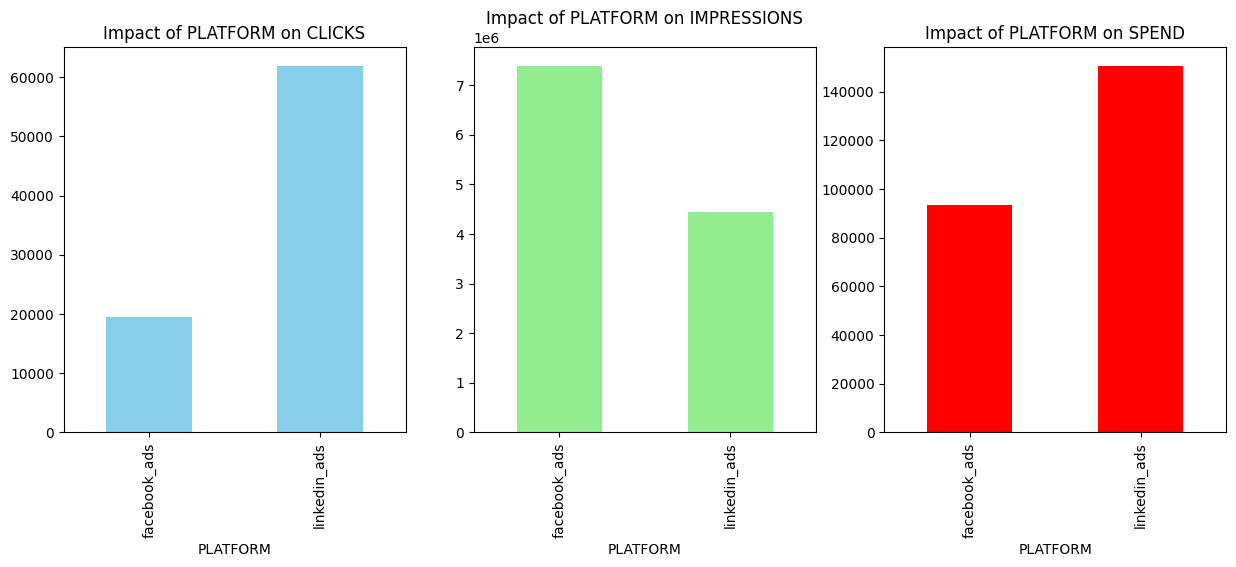

In [21]:
insight_graph("PLATFORM") # Check the 1e6

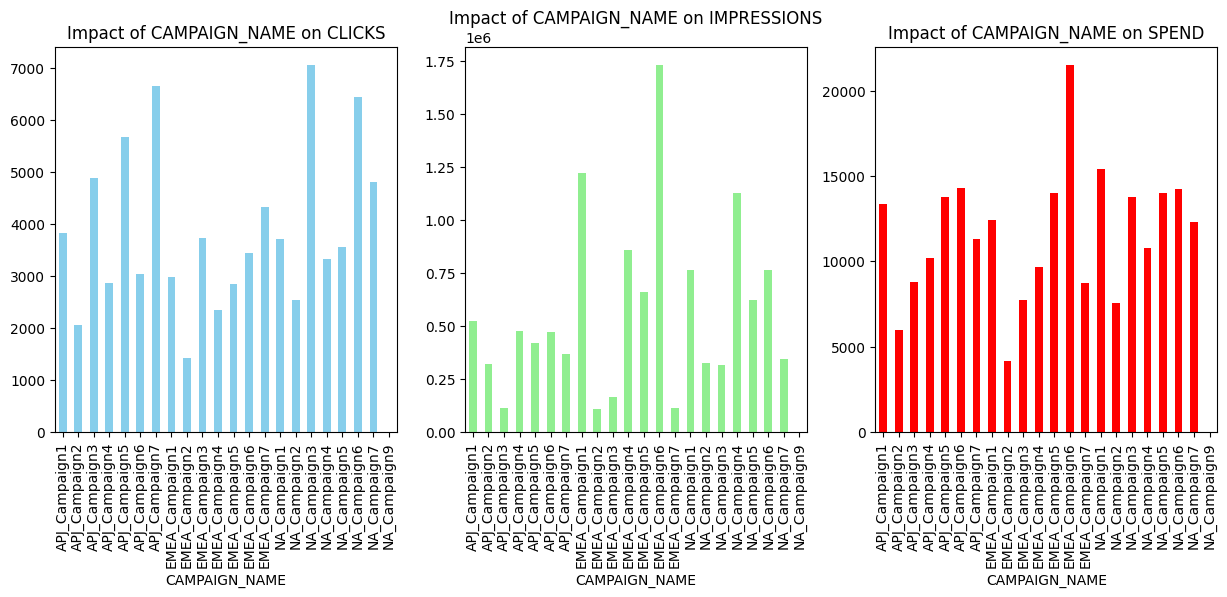

In [22]:
insight_graph("CAMPAIGN_NAME")

In [23]:
def insight_graph2(col, df_test=df_test, kind="bar"):
  # Columns needed for insights
  insights = ["REACH", "LEAD","CONVERSION","REVENUE"]

  # Grouping the necessary columns for plotting
  res_reach = df_test.groupby(col)[insights[0]].sum()
  res_lead = df_test.groupby(col)[insights[1]].sum()
  res_conversion = df_test.groupby(col)[insights[2]].sum()
  res_revenue = df_test.groupby(col)[insights[3]].sum()

  # Plotting the results
  plt.figure(figsize= (20, 5))

  # Subplot 1
  plt.subplot(1, 4, 1)
  res_reach.plot(kind=kind, color="skyblue")
  plt.title(f"Impact of {col} on REACH")

  # Subplot 2
  plt.subplot(1, 4, 2)
  res_lead.plot(kind=kind, color="lightgreen")
  plt.title(f"Impact of {col} on LEAD")
  # plt.ticklabel_format(axis='y', style='plain')  # Uncommenting this will remove 1e6 on the graph which stands for 10Lakhs

  # Subplot 3
  plt.subplot(1, 4, 3)
  res_conversion.plot(kind=kind, color="red")
  plt.title(f"Impact of {col} on CONVERSION")

  # Subplot 4
  plt.subplot(1, 4, 4)
  res_conversion.plot(kind=kind, color="brown")
  plt.title(f"Impact of {col} on REVENUE")

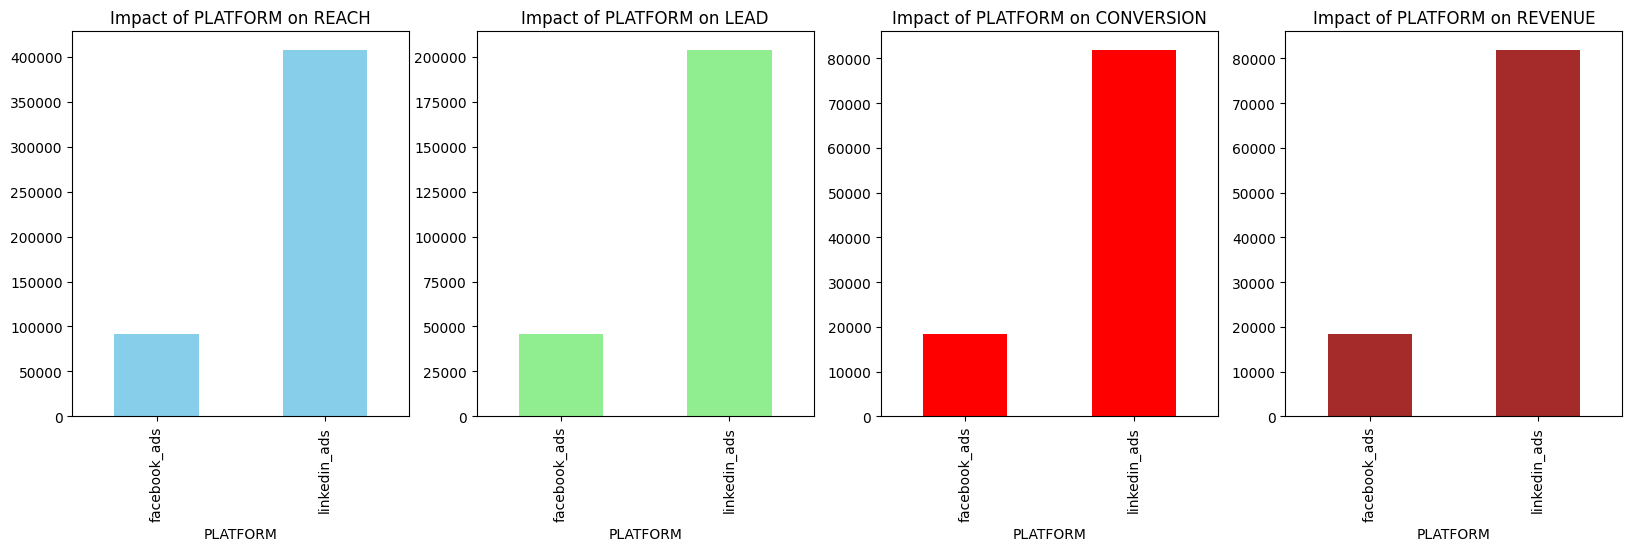

In [24]:
insight_graph2("PLATFORM")

## Analysis

In [50]:
df_test.head()

,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,0.8,16.0,3.0,42,50,2.0,852.11
2,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [54]:
performing = df_test.groupby("CAMPAIGN_NAME")["REVENUE"].sum()
performing.sort_values(ascending=False)[:10]

CAMPAIGN_NAME
NA_Campaign2      302364.79
NA_Campaign1      297891.81
NA_Campaign6      287292.28
APJ_Campaign2     281292.73
NA_Campaign7      279678.16
NA_Campaign3      270182.92
APJ_Campaign1     248682.79
APJ_Campaign3     242436.43
APJ_Campaign7     241925.91
EMEA_Campaign2    238006.04
Name: REVENUE, dtype: float64

In [62]:
def performing(cat_col, num_col):
  """
    Top 10 performing cat_col based on the num_col
  """
  performing = df_test.groupby(cat_col)[num_col].sum()
  return performing.sort_values(ascending=False)[:10]

In [60]:
print(performing("CAMPAIGN_NAME","REVENUE"))

CAMPAIGN_NAME
NA_Campaign2      302364.79
NA_Campaign1      297891.81
NA_Campaign6      287292.28
APJ_Campaign2     281292.73
NA_Campaign7      279678.16
NA_Campaign3      270182.92
APJ_Campaign1     248682.79
APJ_Campaign3     242436.43
APJ_Campaign7     241925.91
EMEA_Campaign2    238006.04
Name: REVENUE, dtype: float64


In [67]:
print(performing("AD_GROUP_NAME","REVENUE"))

AD_GROUP_NAME
NA_Tier2      429850.37
EMEA_Tier2    379424.28
NA_Tier1      379076.78
NA_Tier5      378852.75
APJ_Tier2     360308.59
EMEA_Tier1    340491.81
EMEA_Tier5    331525.88
APJ_Tier1     323736.86
NA_Tier3      309217.78
NA_Tier4      307312.94
Name: REVENUE, dtype: float64


In [71]:
print(performing(["CAMPAIGN_NAME","AD_GROUP_NAME"],"REVENUE"))

CAMPAIGN_NAME  AD_GROUP_NAME
NA_Campaign2   NA_Tier1         30862.28
NA_Campaign6   NA_Tier5         29133.88
NA_Campaign1   NA_Tier2         28663.81
NA_Campaign7   NA_Tier2         28547.70
NA_Campaign1   APJ_Tier1        28424.91
NA_Campaign2   EMEA_Tier2       27808.32
               NA_Tier5         26172.97
NA_Campaign3   NA_Tier2         26106.26
NA_Campaign2   APJ_Tier2        26072.79
NA_Campaign6   APJ_Tier2        25983.91
Name: REVENUE, dtype: float64


In [65]:
def least_performing(cat_col, num_col):
  """
    Top 10 least performing cat_col based on the num_col
  """
  performing = df_test.groupby(cat_col)[num_col].sum()
  return performing.sort_values(ascending=True)[:10]

In [70]:
print(least_performing("CAMPAIGN_NAME","REVENUE"))

CAMPAIGN_NAME
NA_Campaign9         245.38
EMEA_Campaign4    157339.49
EMEA_Campaign5    180300.89
APJ_Campaign4     184831.33
EMEA_Campaign7    202831.70
NA_Campaign4      203208.71
EMEA_Campaign6    210344.93
APJ_Campaign6     210855.02
EMEA_Campaign3    212828.63
APJ_Campaign5     224603.16
Name: REVENUE, dtype: float64


In [68]:
print(least_performing("AD_GROUP_NAME","REVENUE"))

AD_GROUP_NAME
EMEA_Tier4    249144.39
APJ_Tier4     269451.04
APJ_Tier3     282001.07
EMEA_Tier3    294359.63
APJ_Tier5     306849.88
NA_Tier4      307312.94
NA_Tier3      309217.78
APJ_Tier1     323736.86
EMEA_Tier5    331525.88
EMEA_Tier1    340491.81
Name: REVENUE, dtype: float64


In [69]:
print(least_performing(["CAMPAIGN_NAME","AD_GROUP_NAME"],"REVENUE"))

CAMPAIGN_NAME   AD_GROUP_NAME
NA_Campaign9    APJ_Tier1         245.38
EMEA_Campaign5  APJ_Tier3        4269.25
EMEA_Campaign6  NA_Tier4         5505.78
EMEA_Campaign7  NA_Tier4         5667.34
EMEA_Campaign3  NA_Tier4         5943.10
EMEA_Campaign4  NA_Tier3         5992.26
                APJ_Tier5        5996.64
EMEA_Campaign5  EMEA_Tier4       6341.69
EMEA_Campaign4  APJ_Tier3        6807.07
EMEA_Campaign5  APJ_Tier4        6864.17
Name: REVENUE, dtype: float64
